# Initial system modeling with odeint

To begin our exploration of system modeling, we decided to use a tool from CMSE 201: the odeint function. By reducing the orbits to a collection of 2-body systems with the sun always as one body, the odeint function can easily model orbits for the planets. Using real time data from the horizons center, we can calculate the accuracy of our model. All functions used in this notebook are in the ProjectFunctions script. 

### Imports

In [61]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math 
import plotly.express as px
import pandas as pd
import ProjectFunctions as pf

### Correct Position Data 

In [64]:
names = ['JDTDB','cal','x','y','z', 'vx', 'vy', 'vz', 'LT', 'RG', 'RR','LL']

sun_data = pd.read_csv('sun.txt',names=names, skiprows = 46, skipfooter=61)
mercury_data = pd.read_csv('mercury.txt',names=names, skiprows = 46, skipfooter=61)
venus_data = pd.read_csv('venus.txt',names=names, skiprows = 46, skipfooter=61)
earth_data = pd.read_csv('earth.txt',names=names, skiprows = 53, skipfooter=61)
moon_data = pd.read_csv('moon.txt',names=names, skiprows = 47, skipfooter=61)
mars_data = pd.read_csv('mars.txt',names=names, skiprows = 48, skipfooter=61)
jupiter_data = pd.read_csv('jupiter.txt',names=names, skiprows = 47, skipfooter=61)
saturn_data = pd.read_csv('saturn.txt',names=names, skiprows = 47, skipfooter=61)
uranus_data = pd.read_csv('uranus.txt',names=names, skiprows = 47, skipfooter=61)
neptune_data = pd.read_csv('neptune.txt',names=names, skiprows = 47, skipfooter=61)
pluto_data = pd.read_csv('pluto.txt',names=names, skiprows = 42, skipfooter=61)

In [65]:
corr_pos = np.array([mercury_data['RG'],venus_data['RG'],earth_data['RG'],moon_data['RG'],
                    mars_data['RG'],jupiter_data['RG'],saturn_data['RG'],uranus_data['RG'],
                    neptune_data['RG'], pluto_data['RG']])/1.496e+08

### Initializing planetery values 

In [66]:
# mercury  

r0_mercury = np.array([mercury_data['x'][0], mercury_data['y'][0], mercury_data['z'][0]])/1.496e+08 # in au
v0_mercury = np.array([mercury_data['vx'][0], mercury_data['vy'][0], mercury_data['vz'][0]])/4.744

merc_vals = np.array([r0_mercury, v0_mercury])

# venus

r0_venus = np.array([venus_data['x'][0], venus_data['y'][0], venus_data['z'][0]])/1.496e+08 # in au 
v0_venus = np.array([venus_data['vx'][0], venus_data['vy'][0], venus_data['vz'][0]])/4.744

venus_vals = np.array([r0_venus, v0_venus])

# earth

v0_earth = np.array([earth_data['vx'][0], earth_data['vy'][0], earth_data['vz'][0]])/4.744 # in au/s
r0_earth = np.array([earth_data['x'][0], earth_data['y'][0], earth_data['z'][0]])/1.496e+08 # in au

earth_vals = np.array([r0_earth, v0_earth])

# mars 

v0_mars = np.array([venus_data['vx'][0], venus_data['vy'][0], venus_data['vz'][0]])/4.44 # in au/s
r0_mars = np.array([venus_data['x'][0], venus_data['y'][0], venus_data['z'][0]])/1.496e+08 # in au

mars_vals = np.array([r0_mars, v0_mars])
# jupyter 

v0_jup = np.array([jupiter_data['vx'][0], jupiter_data['vy'][0], jupiter_data['vz'][0]])/4.744
r0_jup = np.array([jupiter_data['x'][0], jupiter_data['y'][0], jupiter_data['z'][0]])/1.496e+08 

jup_vals = np.array([r0_jup, v0_jup])

# saturn 

v0_sat = np.array([saturn_data['vx'][0], saturn_data['vy'][0], saturn_data['vz'][0]])/4.744
r0_sat = np.array([saturn_data['x'][0], saturn_data['y'][0], saturn_data['z'][0]])/1.496e+08

sat_vals = np.array([r0_sat, v0_sat])

# Uranus   

v0_ura = np.array([uranus_data['vx'][0], uranus_data['vy'][0], uranus_data['vz'][0]])/4.744
r0_ura = np.array([uranus_data['x'][0], uranus_data['y'][0], uranus_data['z'][0]])/1.496e+08

ura_vals = np.array([r0_ura, v0_ura])

# Neptune  

v0_nep = np.array([neptune_data['vx'][0], neptune_data['vy'][0], neptune_data['vz'][0]])/4.744
r0_nep = np.array([neptune_data['x'][0], neptune_data['y'][0], neptune_data['z'][0]])/1.496e+08

nep_vals = np.array([r0_nep, v0_nep])

# pluto initial 

r0_pluto = np.array([neptune_data['x'][0], neptune_data['y'][0], neptune_data['z'][0]])/1.496e+08
v0_pluto = np.array([neptune_data['vx'][0], neptune_data['vy'][0], neptune_data['vz'][0]])/4.744

plu_vals = np.array([r0_pluto, v0_pluto])

# array form of all planetary vals 

planet_vals = [merc_vals, venus_vals, earth_vals, mars_vals, jup_vals, sat_vals, ura_vals, nep_vals, plu_vals]

### Orbit Calculation and Plotting (5 years)

In [67]:
# calculating all orbits

all_orbits = pf.calc_all_orbits(planet_vals, 5, 1/365) # tf is in years 

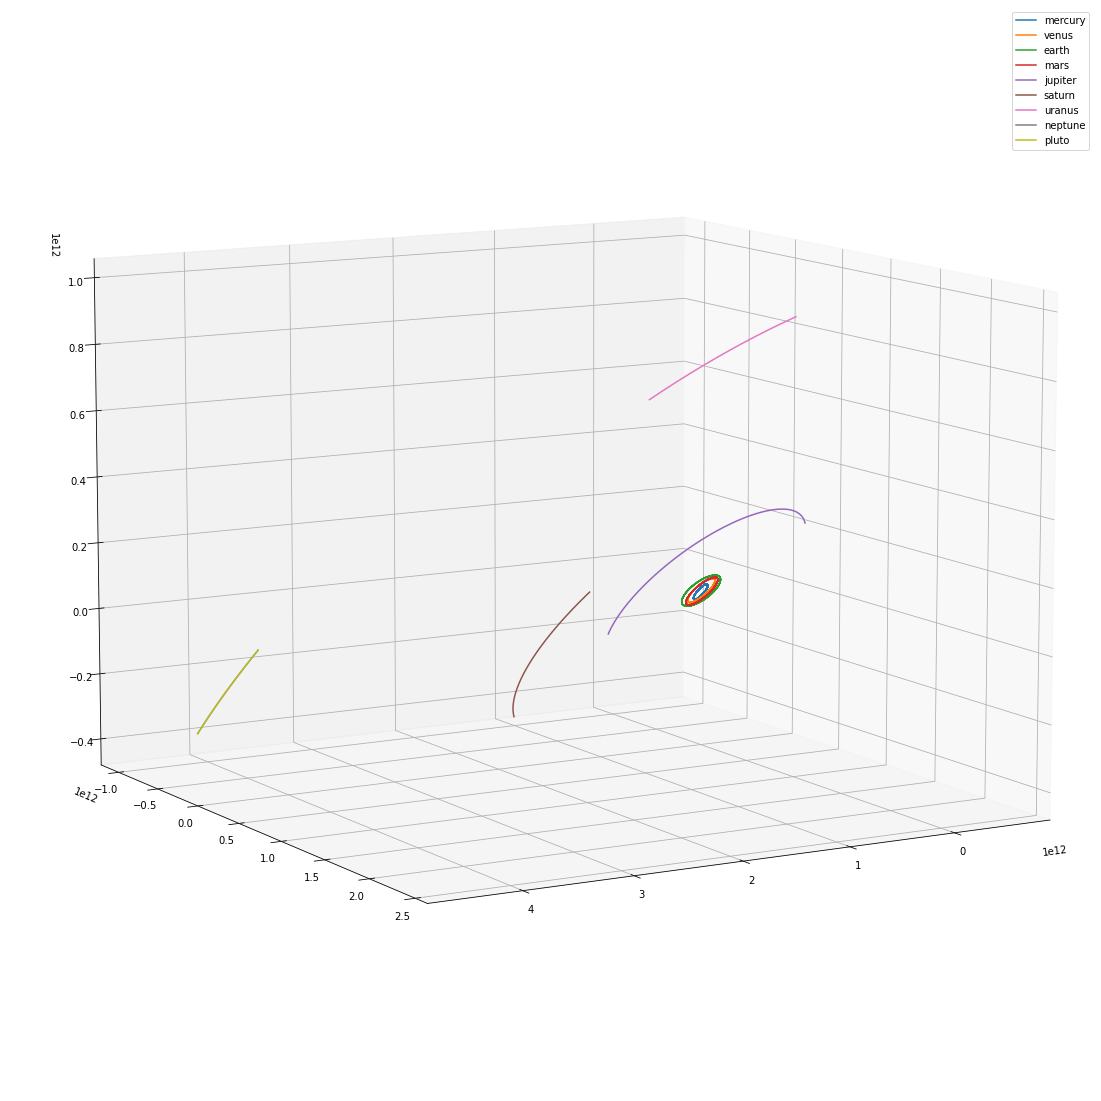

In [68]:
# plotting all orbits

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111,projection='3d')

labels = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']

for (i,j) in zip(range(len(all_orbits)), range(len(labels))):
    ax.plot(all_orbits[i][0],all_orbits[i][1],all_orbits[i][2], label = j)
    
    
ax.view_init(elev = 10, azim = 60)
ax.legend(labels)

### Orbit Calculation and Plotting (25 years)

In [69]:
# calculating all orbits

all_orbits = pf.calc_all_orbits(planet_vals, 25, 1/365) # tf is in years 

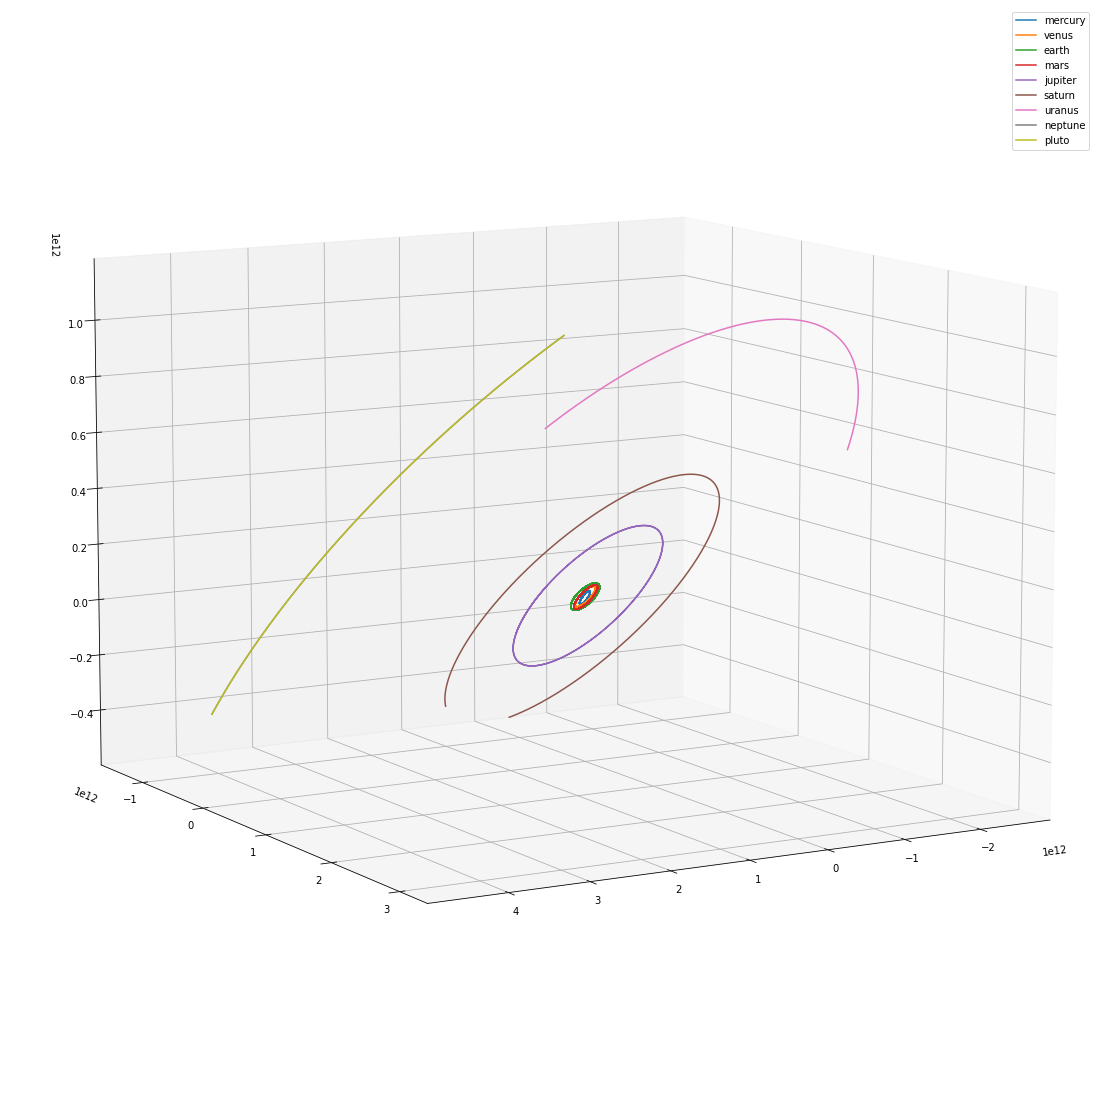

In [70]:
# plotting all orbits

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111,projection='3d')

labels = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']

for (i,j) in zip(range(len(all_orbits)), range(len(labels))):
    ax.plot(all_orbits[i][0],all_orbits[i][1],all_orbits[i][2], label = j)
    
    
ax.view_init(elev = 10, azim = 60)
ax.legend(labels)

### Orbit Calculation and Plotting (100 years)

In [71]:
# calculating all orbits

all_orbits = pf.calc_all_orbits(planet_vals, 100, 1/365) # tf is in years 

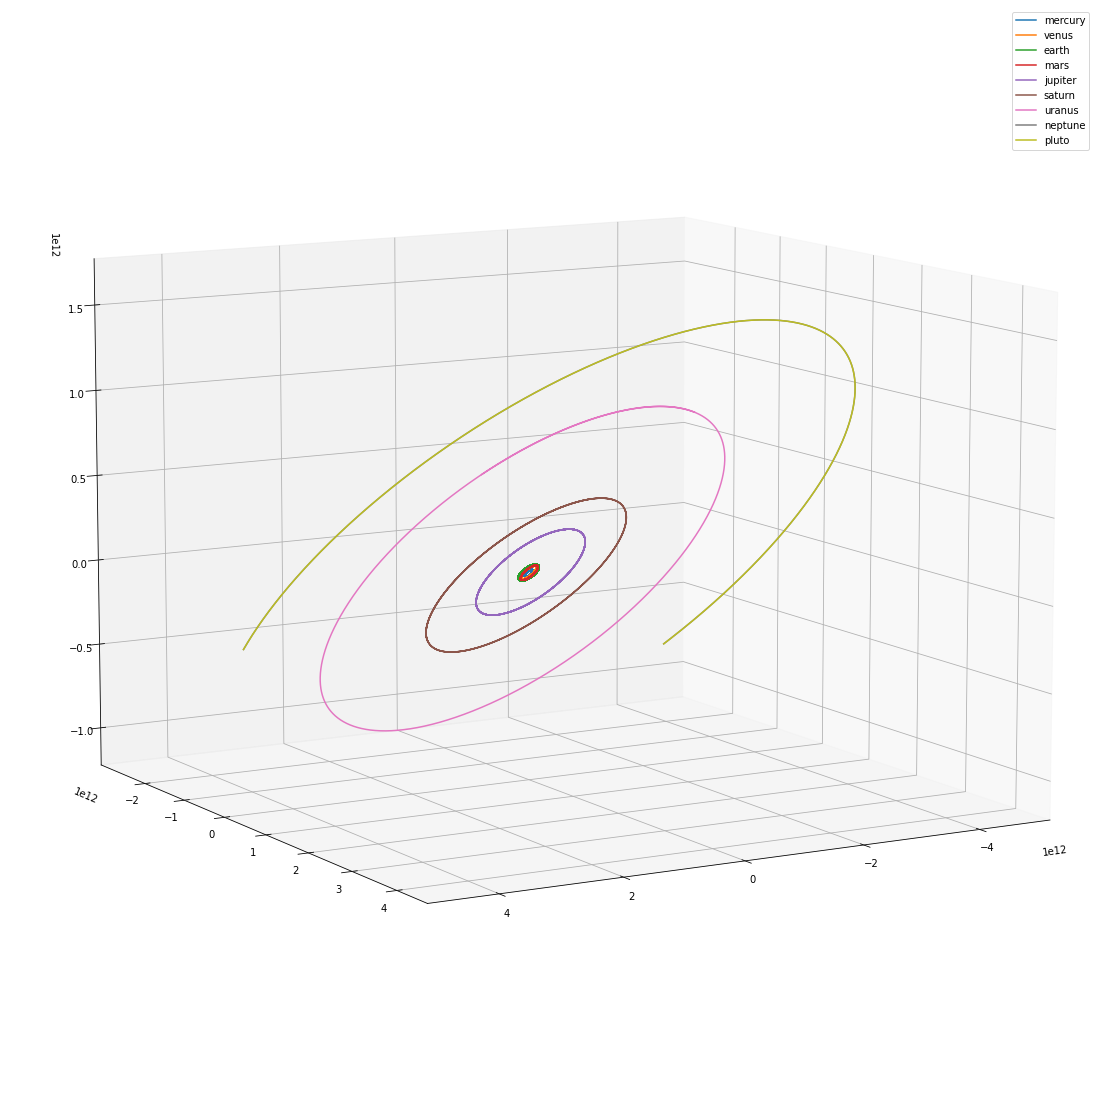

In [72]:
# plotting all orbits

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111,projection='3d')

labels = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']

for (i,j) in zip(range(len(all_orbits)), range(len(labels))):
    ax.plot(all_orbits[i][0],all_orbits[i][1],all_orbits[i][2], label = j)
    
    
ax.view_init(elev = 10, azim = 60)
ax.legend(labels)

# Residual Calculation: 

In [73]:
# resetting all_orbits to correct length (1 year)
all_orbits = pf.calc_all_orbits(planet_vals, 1, 1/366) # tf is in years 

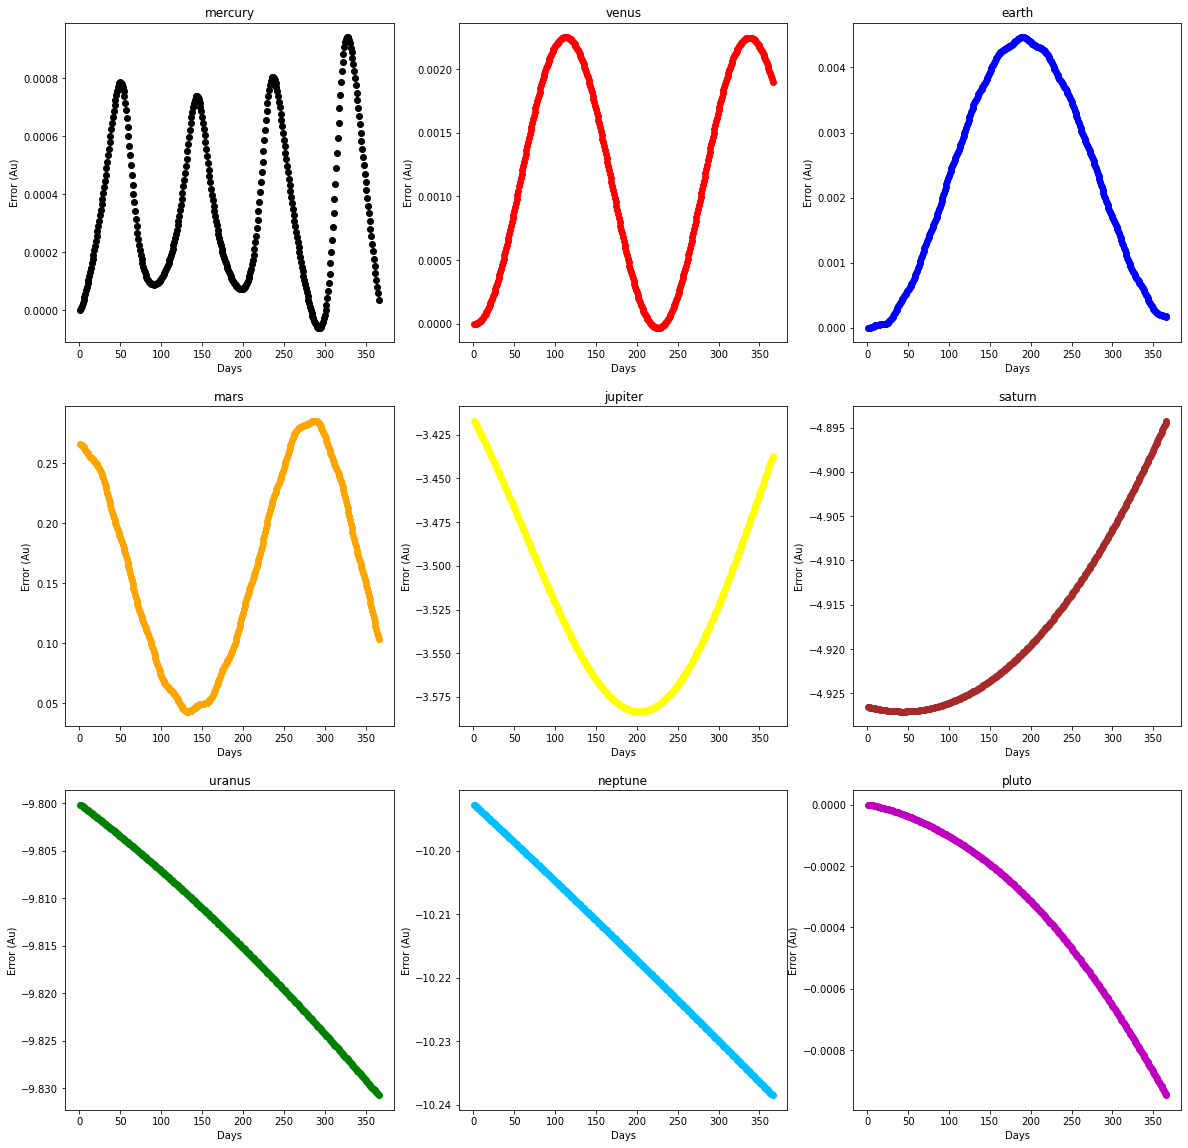

In [90]:
fig, axs = plt.subplots(3,3, figsize = (20,20))
axs = axs.ravel()

labels = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']
colors = ['black', 'red', 'blue', 'orange', 'yellow', 'brown', 'green', 'deepskyblue', 'm' ]

t = np.arange(1,367)

resid = calculate_resid(all_orbits, corr_pos)

for (i,j) in zip(range(len(resid)), range(len(labels))):
    axs[i].scatter(t, resid[i], label = j, c = colors[i])
    axs[i].set_title(labels[j])
    axs[i].set_xlabel('Days')
    axs[i].set_ylabel('Error (Au)')